# <h1><center>**`Employee Attrition Problem`**</center></h1>

### `Problem Statements`
We have to find out, why employees are leaving company.

### `Dataset Desciption`

The dataset folder contains the following files:

**train_dataset.csv** = 1000000 x 8

**train_salaries.csv** = 1000000 x 2

**test_dataset.csv** =  1000000 x 8

Columns Provided in the Dataset

1. **jobId** - Unique ID that indicates the employee
2. **companyId** - Unique ID that idicates the company
3. **jobType** - Shows which post the employee is working for the company
4. **degree** - shows which degree is completed by the employee
5. **major** - shows the field in which the employee is specialised in
6. **industry** - show the industry in which the employee is working
7. **yearsExperience** - years of working experience the employee is having
8. **milesFromMetropolis** - distance in miles between the comapny and his house
9. **salary** - salary given to the employee.
eg. 250 indicates 2,50,000 in dollars

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
# Load the train_dataset, train_salaries, test_dataset
train = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\ml project\1\train_dataset.csv")
test = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\ml project\1\test_dataset.csv")
salary = pd.read_csv(r'C:\Users\Roshan Salunke\Downloads\Data Science Course\ml project\1\train_salaries.csv')

In [3]:
# check the train data
train.head()

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  
0   HEALTH               10                   83  
1      WEB                3                   73  
2   HEALTH               10                   38  
3     AUTO                8                   17  
4  FINANCE                8                   16

In [4]:
# check the train data salarie
salary.head()

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163

In [5]:
# check the test data
test.head()

jobId companyId  jobType       degree    major industry  \
0  JOB1362685407687    COMP33  MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13   JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10      CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21  MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36   JUNIOR     DOCTORAL  BIOLOGY      OIL   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44

In [6]:
# Adding salary data to train_dataset using merge on jobId
train = pd.merge(train, salary, on='jobId')

In [7]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train = train[train['salary']>30]

# Basic EDA

## Identifying the number of features or columns

## Know all the names of the columns¶

In [8]:
# get all column names
train.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

## Knows more about the data in the columns like data type it contains and total samples of each

In [9]:
# Check which columns are having categorical, numerical or boolean values of train_dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [10]:
# Check which columns are having categorical, numerical or boolean values of test_dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


1. After checking the Dtypes of all the columns 
    1. object - String values
    1. int64 - Numerical values
1. There are more String values than the numerical values in the dataset

## Know more mathematical relations of the dataset like count, min, max values, standarad deviation values, mean and different percentile values

In [11]:
# For train_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
train.describe()

yearsExperience  milesFromMetropolis         salary
count    997548.000000        997548.000000  997548.000000
mean         12.015214            49.458372     116.280462
std           7.204992            28.863518      38.512936
min           0.000000             0.000000      31.000000
25%           6.000000            24.000000      89.000000
50%          12.000000            49.000000     114.000000
75%          18.000000            74.000000     141.000000
max          24.000000            99.000000     301.000000

In [12]:
# for test_dataset
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns
test.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

## Get the total number of samples in the dataset

In [13]:
# len of train and test dataset
print('train data length: ', len(train))
print('test data length: ', len(test))

train data length:  997548
test data length:  1000000


## Get unique values

In [14]:
# get how many unique values are in train_dataset
for i in train.columns:
    unique = train[i].nunique()
    print(f'Unique values in column {i}: {unique}')

Unique values in column jobId: 997548
Unique values in column companyId: 63
Unique values in column jobType: 8
Unique values in column degree: 5
Unique values in column major: 9
Unique values in column industry: 7
Unique values in column yearsExperience: 25
Unique values in column milesFromMetropolis: 100
Unique values in column salary: 265


In [15]:
# get how many unique values are in test_dataset
for i in test.columns:
    unique = test[i].nunique()
    print(f'Unique values in column {i}: {unique}')

Unique values in column jobId: 1000000
Unique values in column companyId: 63
Unique values in column jobType: 8
Unique values in column degree: 5
Unique values in column major: 9
Unique values in column industry: 7
Unique values in column yearsExperience: 25
Unique values in column milesFromMetropolis: 100


## Counting the total number of missing values¶

In [16]:
# Check for missing values in all the columnns of the train_dataset
train.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [17]:
 # Check for missing values in all the columnns of the test_dataset
test.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

## By the observation gather from the train_data.info(), we can know there are no missing values in the train and test dataset

## removing 'jobId' and 'companyId' data from train and test data

In [18]:
# drop jobId and companyId from train_dataset
train = train.drop(['jobId', 'companyId'],axis=1)
train.head()

jobType       degree      major industry  yearsExperience  \
0             CFO      MASTERS       MATH   HEALTH               10   
1             CEO  HIGH_SCHOOL       NONE      WEB                3   
2  VICE_PRESIDENT     DOCTORAL    PHYSICS   HEALTH               10   
3         MANAGER     DOCTORAL  CHEMISTRY     AUTO                8   
4  VICE_PRESIDENT    BACHELORS    PHYSICS  FINANCE                8   

   milesFromMetropolis  salary  
0                   83     130  
1                   73     101  
2                   38     137  
3                   17     142  
4                   16     163

In [19]:
# drop jobId and companyId from test_dataset
test = test.drop(['jobId', 'companyId'],axis=1)
test.head()

jobType       degree    major industry  yearsExperience  \
0  MANAGER  HIGH_SCHOOL     NONE   HEALTH               22   
1   JUNIOR         NONE     NONE     AUTO               20   
2      CTO      MASTERS  BIOLOGY   HEALTH               17   
3  MANAGER  HIGH_SCHOOL     NONE      OIL               14   
4   JUNIOR     DOCTORAL  BIOLOGY      OIL               10   

   milesFromMetropolis  
0                   73  
1                   47  
2                    9  
3                   96  
4                   44

## Check for categorical columns in the dataset

By observing the train_data.info() cell, we can biforcate the datatype for which the object is the values which indicates those are the categorical columns. This dataset has more categorical columns than numerical values

1. jobType
2. degree
3. major
4. industry

In [20]:
categorical = train.select_dtypes(include = 'object')
num = train.select_dtypes(include=['int', 'float'])

## Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [21]:
# Correlation metrix using pandas
corr = num.corr()
corr

yearsExperience  milesFromMetropolis    salary
yearsExperience             1.000000             0.003642  0.370974
milesFromMetropolis         0.003642             1.000000 -0.294435
salary                      0.370974            -0.294435  1.000000

## From above correlation matrix:
1. yearsExperience and salary are positively correlated.

2. yearsExperience and milesFromMetropolis have no correlation.

3. milesFromMetropolis and salary are weakly negatively correlated.

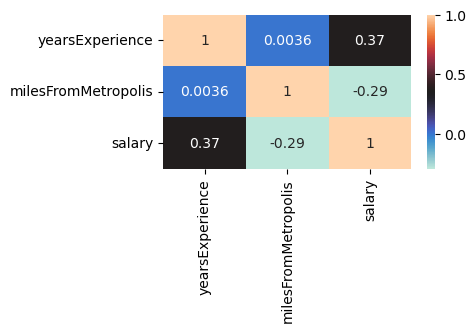

In [22]:
# Correlation metrix using seaborn
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap='icefire',annot=True)
plt.show()

## Chi-square Test



1. The Chi Square statistic is commonly used for testing relationships between categorical variables.

2. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

3. Example: Is there any significant relationship between gender and education qualification?

4. The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation.

5. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table. that is values of one variable represents the row and other's value represents the column.

6. Formula: x^2 = Summation of( (observed value - Expected value)^2/Expected value )

7. The Chi-Square statistic is based on the difference between what is actually observed in the data and what would be expected if there was truly no relationship between the variables.

8. This statistic can be evaluated by comparing the actual value against a critical value found in a Chi-Square distribution (where degrees of freedom is calculated as of rows – 1 x columns – 1), but it is easier to simply examine the p-value.

9. To make a conclusion about the hypothesis with 95% confidence. Significance(p value of the Chi-square statistic) should be less than 0.05.

    1. Alpha level = 0.05(i.e 5%) 95% confidence about conclusion and 5% risk of not making a correct conclusion.

    2. Interpret the key results for Chi-Square Test for Association

        Determine whether the association between the variables is statistically significant.

        Examine the differences between expected counts and observed counts to determine which variable levels may have the most impact on association.


In [23]:
# Import necessary libraries for performing Chi-square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Helper function for performing chi-square test
def perform_chi_square_test(var_1,var_2):
    
    #Contingency Table
    contingency_table = pd.crosstab(train[var_1],train[var_2])
    
    
    #Observed Values
    observed_values = contingency_table.values
    
    
    #Expected Values
    b = chi2_contingency(contingency_table)
    
    expected_values = b[3]
    
    #Degree of Freedom
    no_of_rows = len(contingency_table.iloc[0:,0])
    no_of_columns = len(contingency_table.iloc[0,0:])
    degree_f = (no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",degree_f)
    
    #Significance Level 5%
    alpha = 0.05
    print('Significance level: ',alpha)
    
    #chi-square statistic
    chi_square = sum([(o-e)**2./e for o,e in zip(observed_values, expected_values)])
    chi_square_statistic = chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)
    
    #critical_value
    critical_value = chi2.ppf(q=1-alpha, df=degree_f)
    print('critical_value:',critical_value)
    
    #p-value
    p_value = 1-chi2.cdf(x=chi_square_statistic, df=degree_f)

    print('p-value:',p_value)
          
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

In [24]:
# looping on categorical data list and use function for performing chi-square test on columns from dataset
for x in categorical:
    for i in categorical:
        if i != x:
            print('chi-square test on: ',x,' ',i,'\n')
            perform_chi_square_test(x,i)
            print('-------------------------------------------------------------------\n')

chi-square test on:  jobType   degree 

Degree of Freedom:  28
Significance level:  0.05
chi-square statistic:  49153.86411257831
critical_value: 41.33713815142739
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   major 

Degree of Freedom:  56
Significance level:  0.05
chi-square statistic:  16381.915810303108
critical_value: 74.46832415930936
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables
-------------------------------------------------------------------

chi-square test on:  jobType   industry 

Degree of Freedom:  42
Significance level:  0.05
chi-square statistic:  100.30610291761408
critical_value: 58.12403768086803
p-value: 1.1246299327360987e-06
Reject H0,There is a relationship between 2 c

From above chi-square test:

- correlated variables:

  1. jobtype and degree
  2. jobtype and major
  3. degree and major


## Scatter Plot



1. A scatter plot is a type of plot using Cartesian coordinates to display values for typically two variables for a set of data.

2. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

3. Scatter plot's are used to observe and show relationships between two numeric variables.


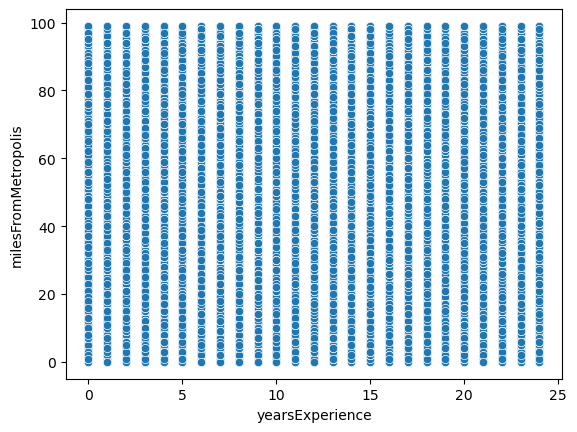

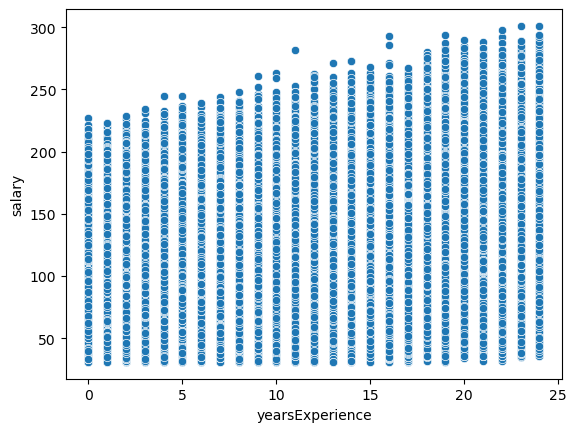

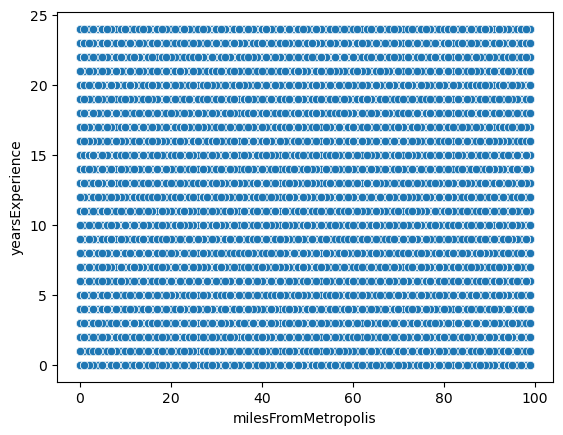

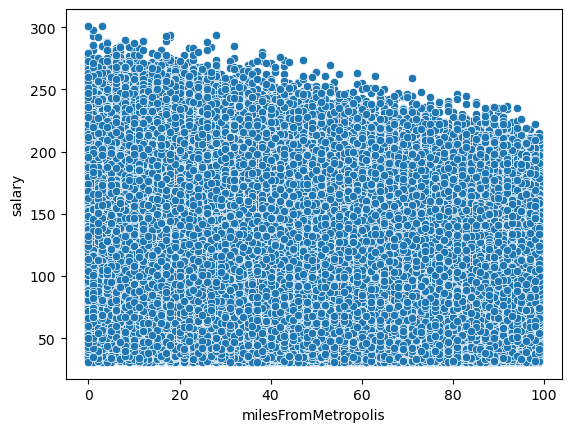

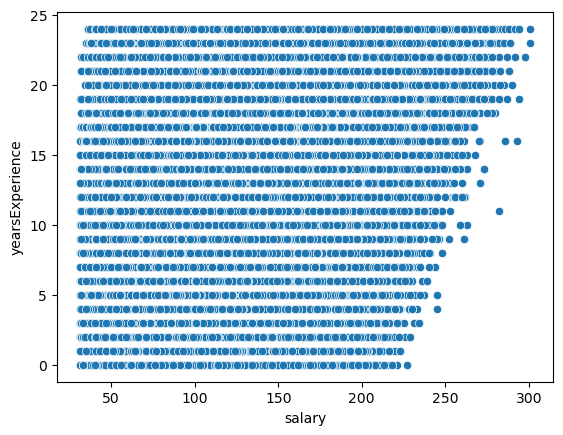

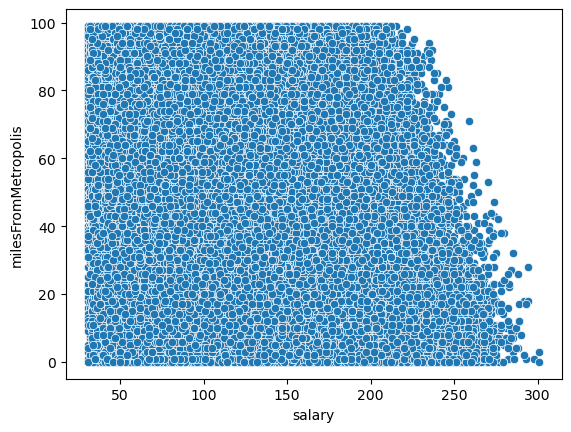

In [25]:
# Scatter plot using matplotlib 
## create function for ploting scatterplot between two columns of dataset
def plot_scatter(x, y):
    sns.scatterplot(num[x], num[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Loop through the different columns 
for i in num:
    for j in num:
        if i != j:
            plot_scatter(i, j)

From above scatter plot

1. Increase in value on yearsExperience axis results in increase of values on salary axis. That is they are positively correlated.

2. Increase in value on 
milesFromMetropolis axis results in decrease of values on salary axis. That is they are negatively correlated.

2. There is no change in values of yearExperience vs milesFromMetropolis graph. That is there is no correlation between these variables.

## Histogram



1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".


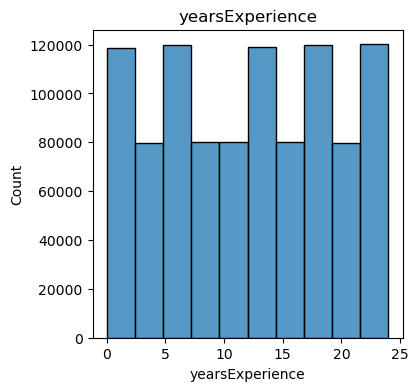

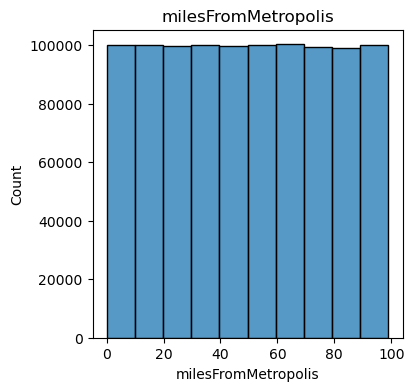

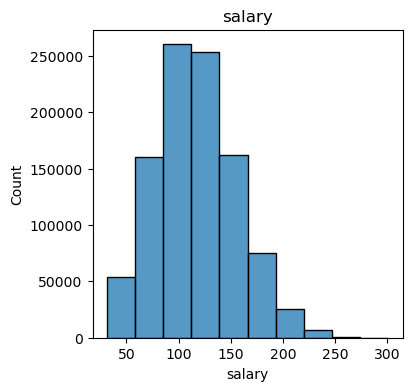

In [26]:
## Histogram using pandas 
for i in num.columns:
    plt.figure(figsize=(4,4))
    sns.histplot(num[i],bins=10)
    plt.title(i)
    plt.show()

From the above histogram

1. yearsExperience data distribution is symmetric.

2. milesFromMetropolis data distribution is symmetric.

3. salary data distribution is symmetric, unimodel (it has only one peak in distribution)


## Box Plot

A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset


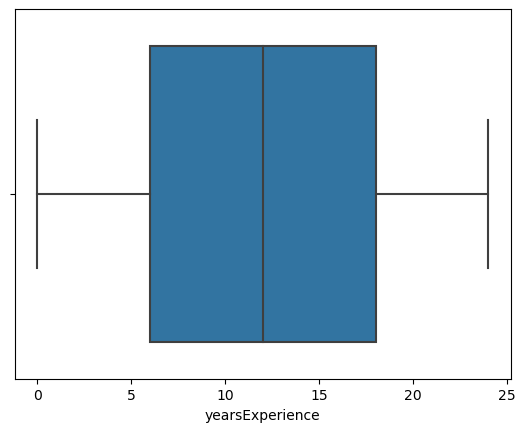

In [27]:
#box plot for yearsExperience column
sns.boxplot(num['yearsExperience'])
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has yearExperience of between range 0 to 6.
  2. 25% of employee has yearExperience between range 6 to 12.
  3. 25% of employee has yearExperience between range 12 to 18.
  4. 25% of employee has yearExperience between range 18 to 24

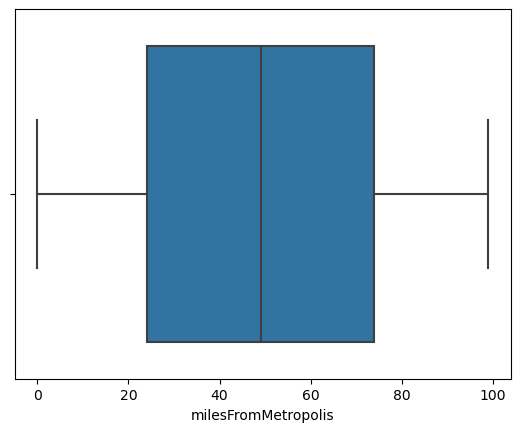

In [28]:
 # box plot for milesFromMetropolies column
sns.boxplot(num['milesFromMetropolis'])
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of milesFromMetropolis between range 0 to 24.
  2. 25% of employee has value of milesFromMetropolis between range 24 to 52.
  3. 25% of employee has value of milesFromMetropolis between range 52 to 76.
  4. 25% of employee has value of milesFromMetropolis between range 76 to 100

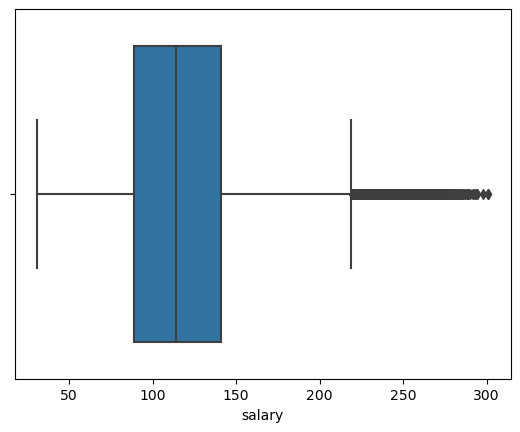

In [29]:
## box plot for salary column
sns.boxplot(num['salary'])
plt.show()

from above box plot graph:

- yearsExperience
  1. 25% of employees from dataset has value of salary between range 0 to 88.
  2. 25% of employee has value of salary between range 88 to 120.
  3. 25% of employee has value of salary between range 120 to 150.
  4. 25% of employee has value of salary between range 150 to 300


- The mean salary is around 120


## Violin Plot



1. A violin plot is a method of plotting numeric data.

1. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

3. It has:

    1. Median (a white dot on the violin plot)
    2. Interquartile range (the black bar in the center of violin)
    3. The lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third quartile + 1.5 IQR respectively.

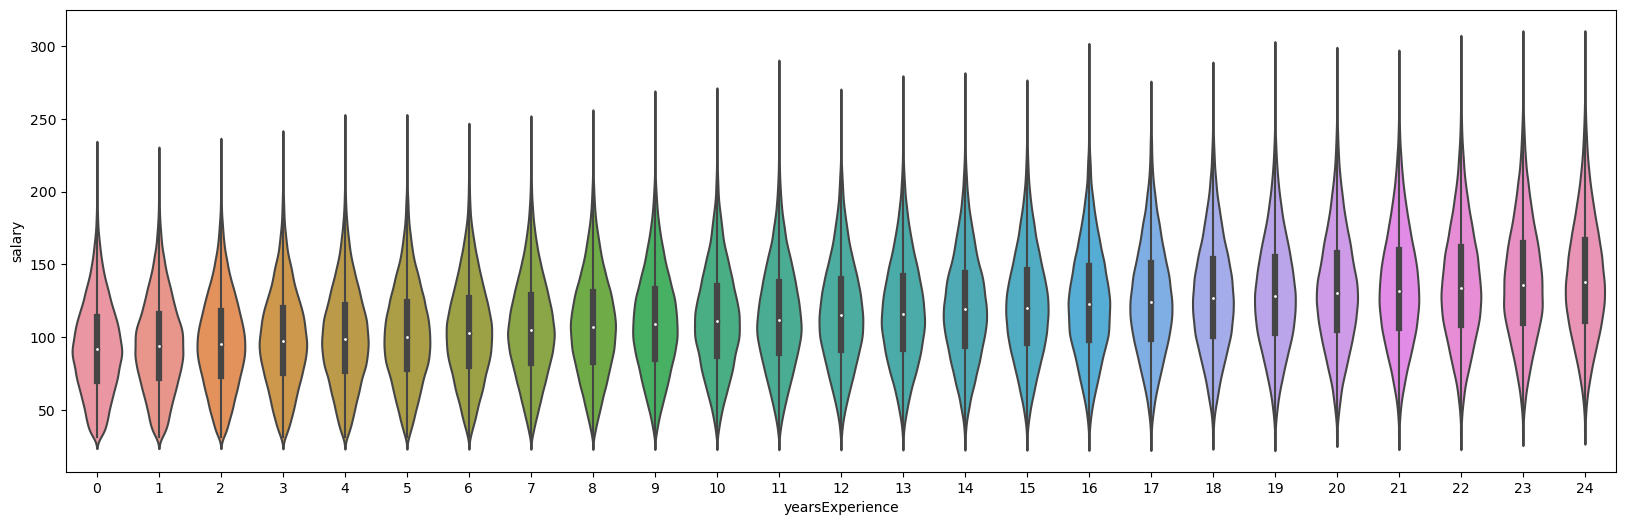

In [30]:
## violin plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.violinplot(num['yearsExperience'],num['salary'])
plt.xlabel('yearsExperience')
plt.ylabel('salary')
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile. whereas median has the highest.
3. The salary range is increasing as we move right on the axis of yearExperience

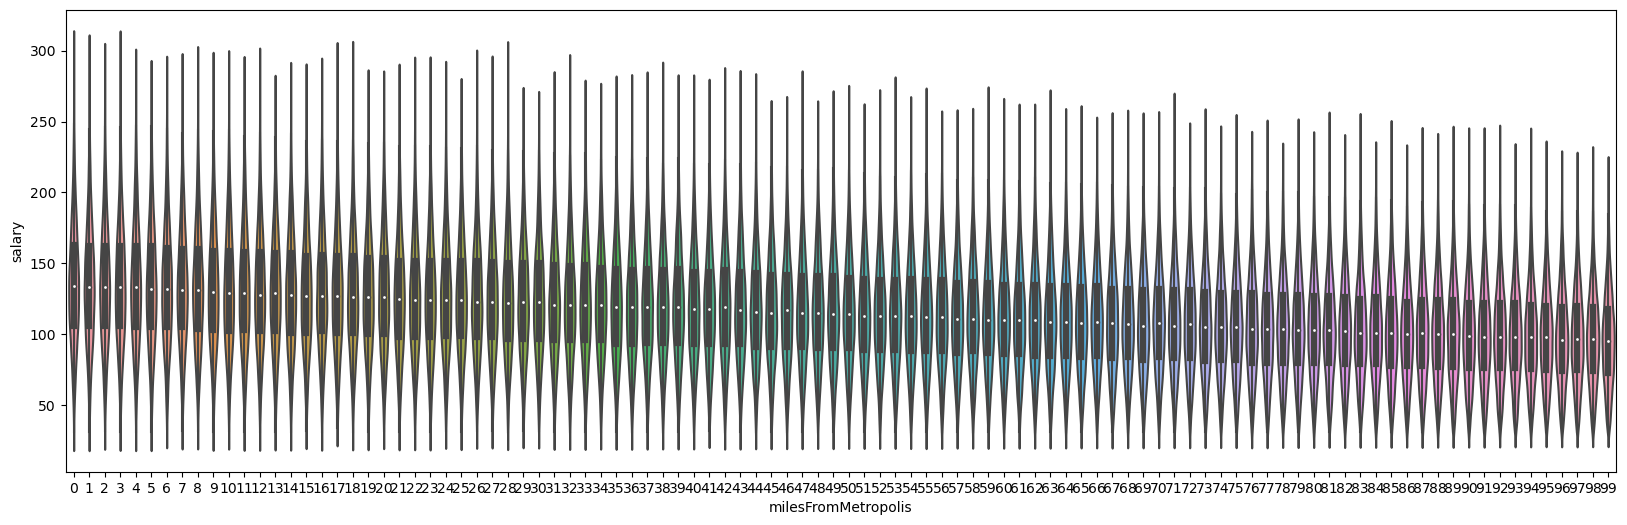

In [31]:
# violin plot for milesFromMetropolis from salary columns
plt.figure(figsize=(20,6))
sns.violinplot(num['milesFromMetropolis'],num['salary'])
plt.xlabel('milesFromMetropolis')
plt.ylabel('salary')
plt.show()

from above violin plot:
1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.
3. The salary range is decreasing as we move right on the axis of milesFromMetropolis


## Boxenplot

1. The boxen plot, otherwise known as a Letter-value plot, is a box plot meant for large data sets (n > 10,000).

2. The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values.

3. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.


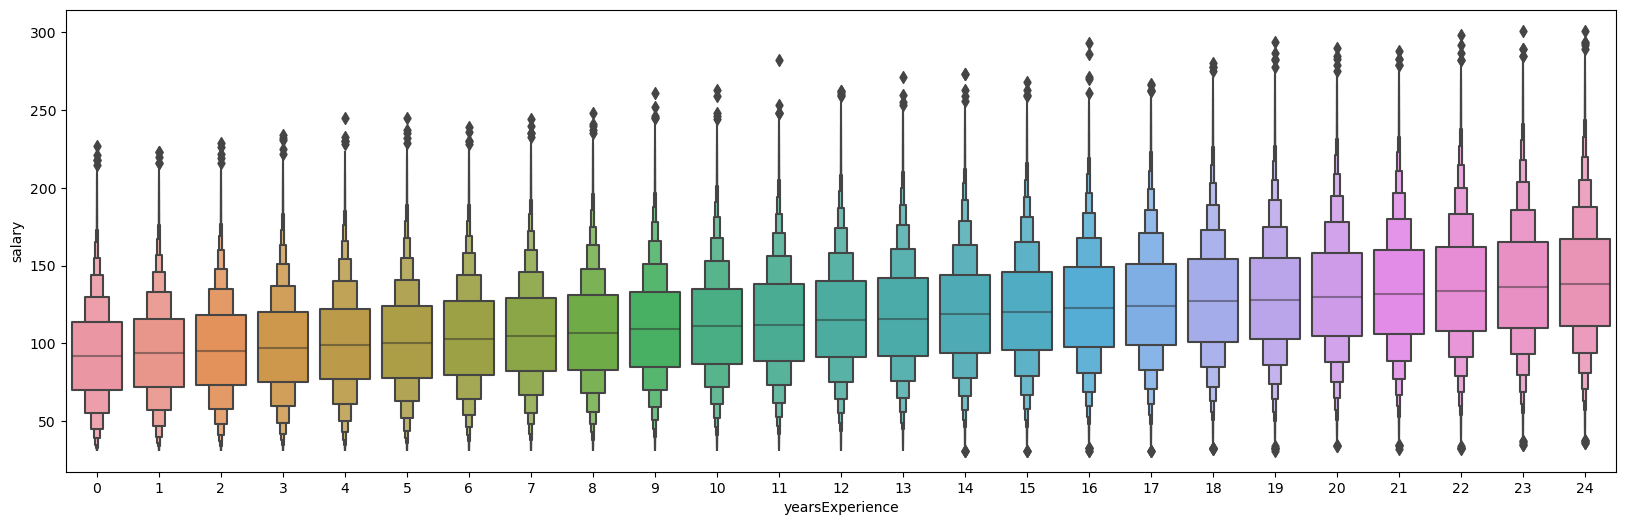

In [32]:
# boxen plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(num['yearsExperience'],num['salary'])
plt.show()

## Count Plot

1. A countplot is kind of like a histogram or a bar graph for some categorical area.

2. It simply shows the number of occurrences of an item based on a certain type of category.


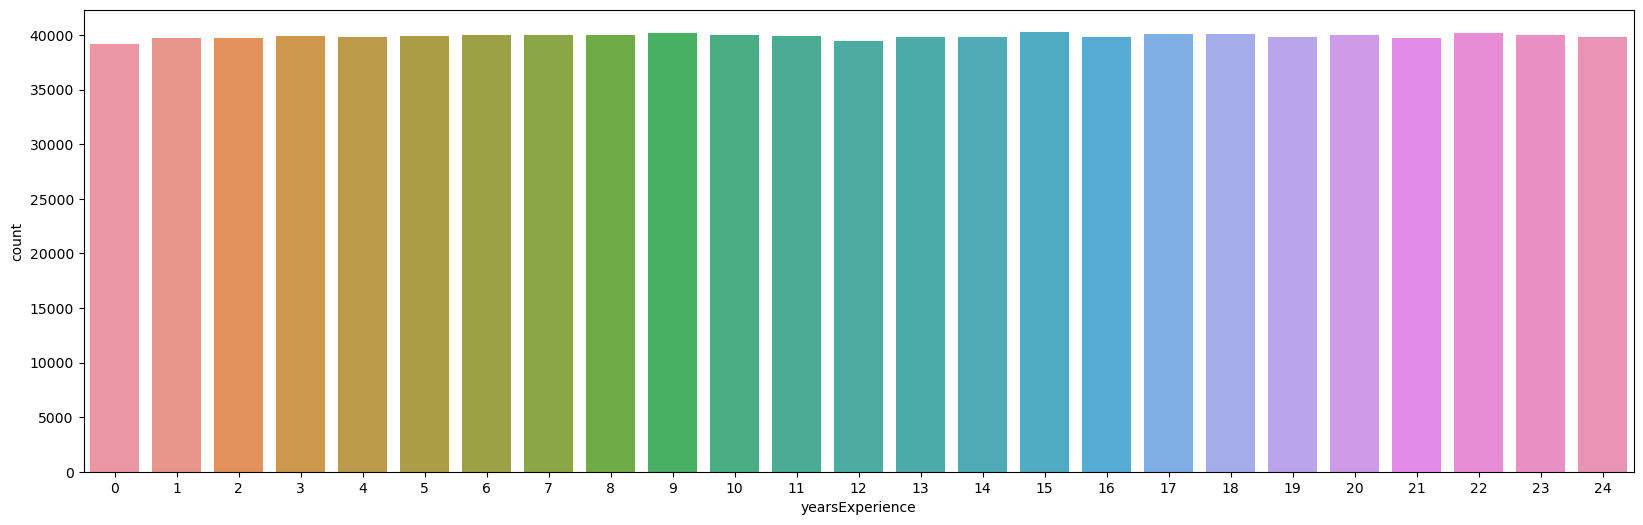

In [33]:
# count plot of whole datset based on yearsExperience
plt.figure(figsize=(20,6))
sns.countplot(num['yearsExperience'])
plt.show()

From above count plot

distribution of values of yearExperience is equal over complete dataset, symmetrical.

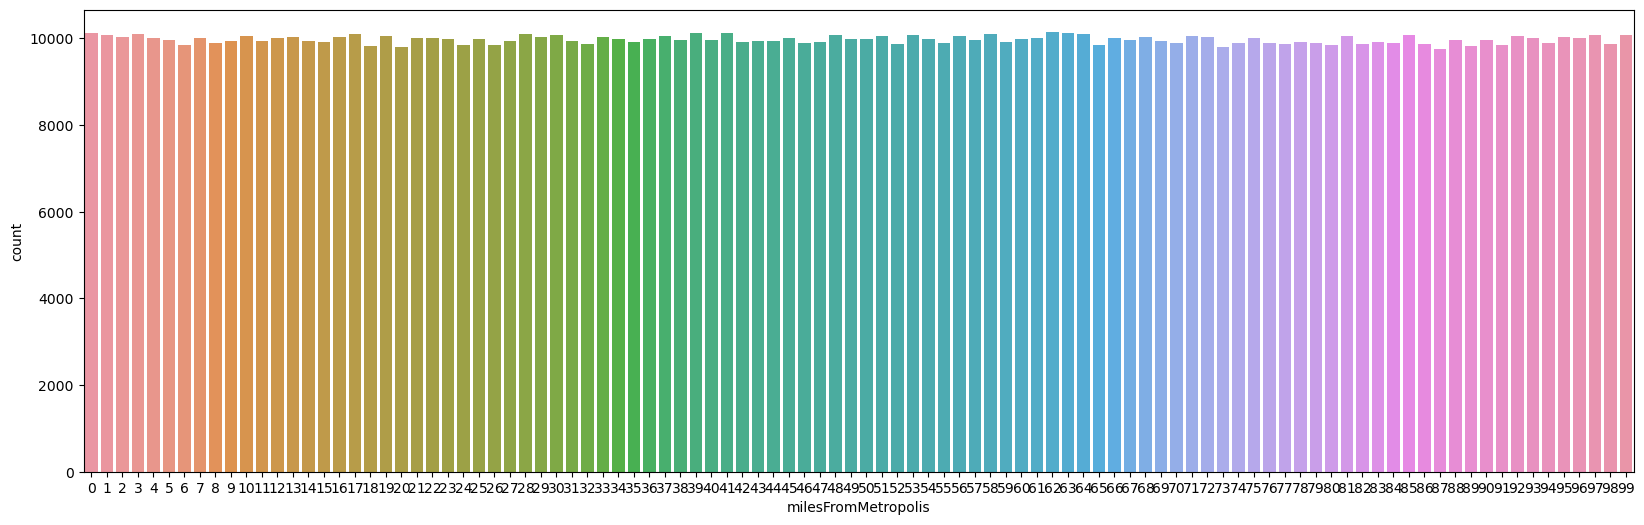

In [34]:
#count plot of whole datset based on milesFromMetropolis
plt.figure(figsize=(20,6))
sns.countplot(num['milesFromMetropolis'])
plt.show()

From above count plot

distribution of values of milesFromMetropolis is almost equal over complete dataset, symmetrical

## Subset of train dataset

ploting process of swarm plot was taking huge time because of large dataset.

So, I take a subset of 50000 samples from train datset and plot it for interpretation.

## Swarm Plot



1. The swarm plot is a type of scatter plot, but helps in visualizing different categorical variables.

2. Scatter plots generally plots based on numeric values, but most of the data analyses happens on categorical variables. So, swarm plots seem very useful in those cases.


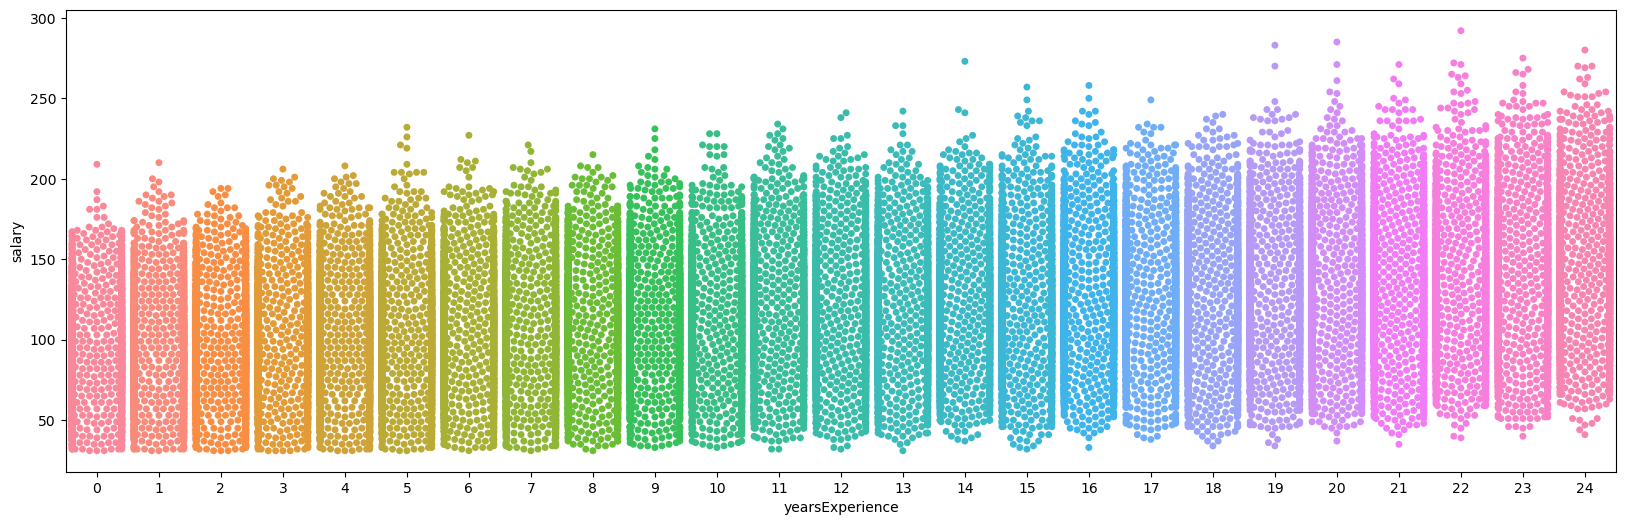

In [35]:
# swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(num['yearsExperience'][:50000],num['salary'][:50000])
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

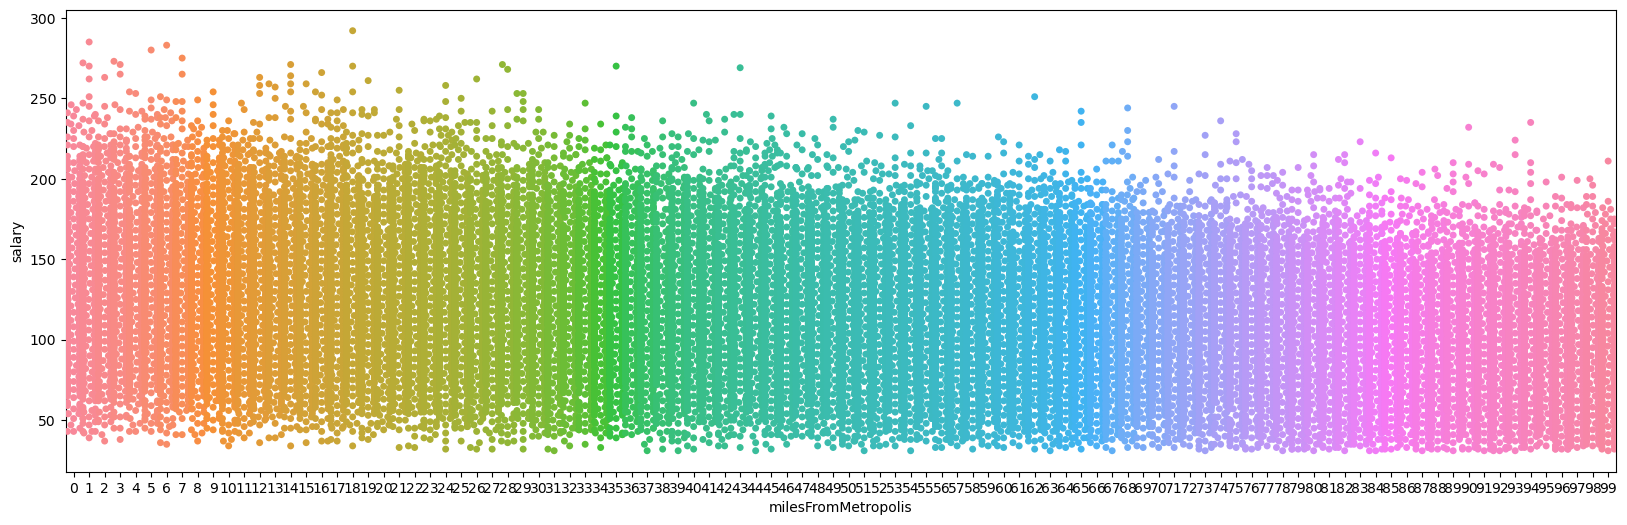

In [36]:
# swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.swarmplot(num['milesFromMetropolis'][:50000],num['salary'][:50000])
plt.show()

from above swarm plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

## Combine plot

Combination of boxenplot and swarm plot

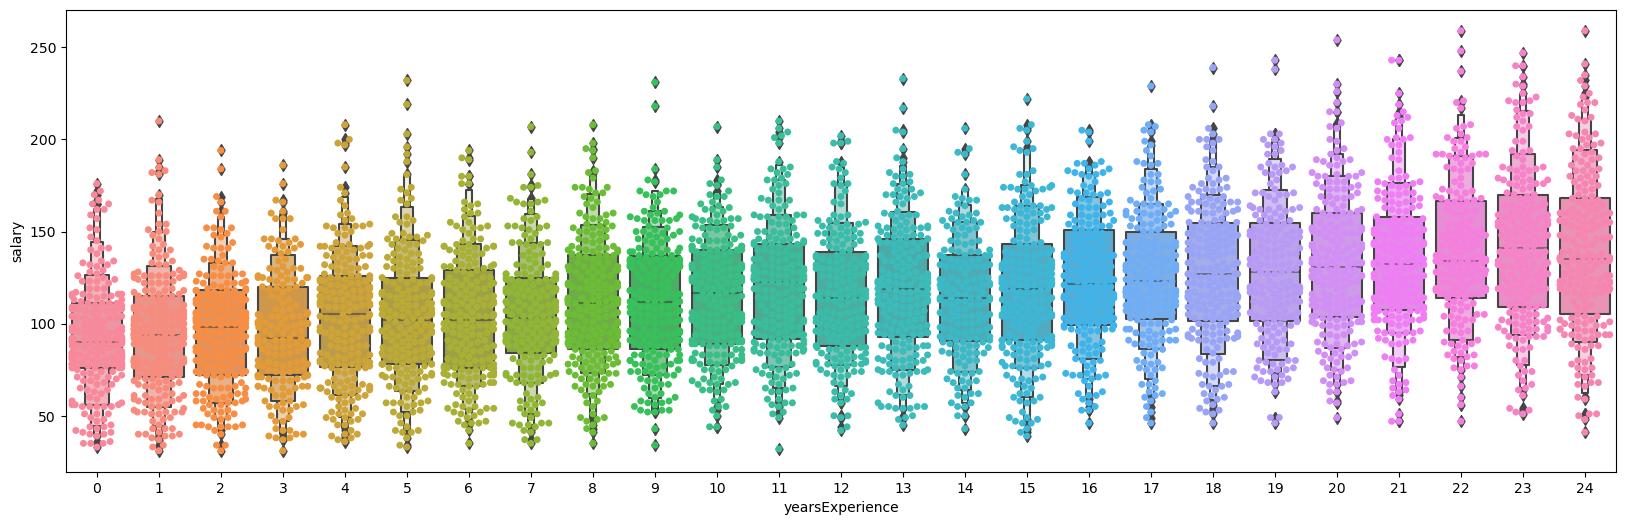

In [37]:
# combine boxen and swarm plot for yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(num['yearsExperience'][:5000],num['salary'][:5000])
sns.swarmplot(num['yearsExperience'][:5000],num['salary'][:5000])
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.

2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is increasing as we move right on the axis of yearExperience

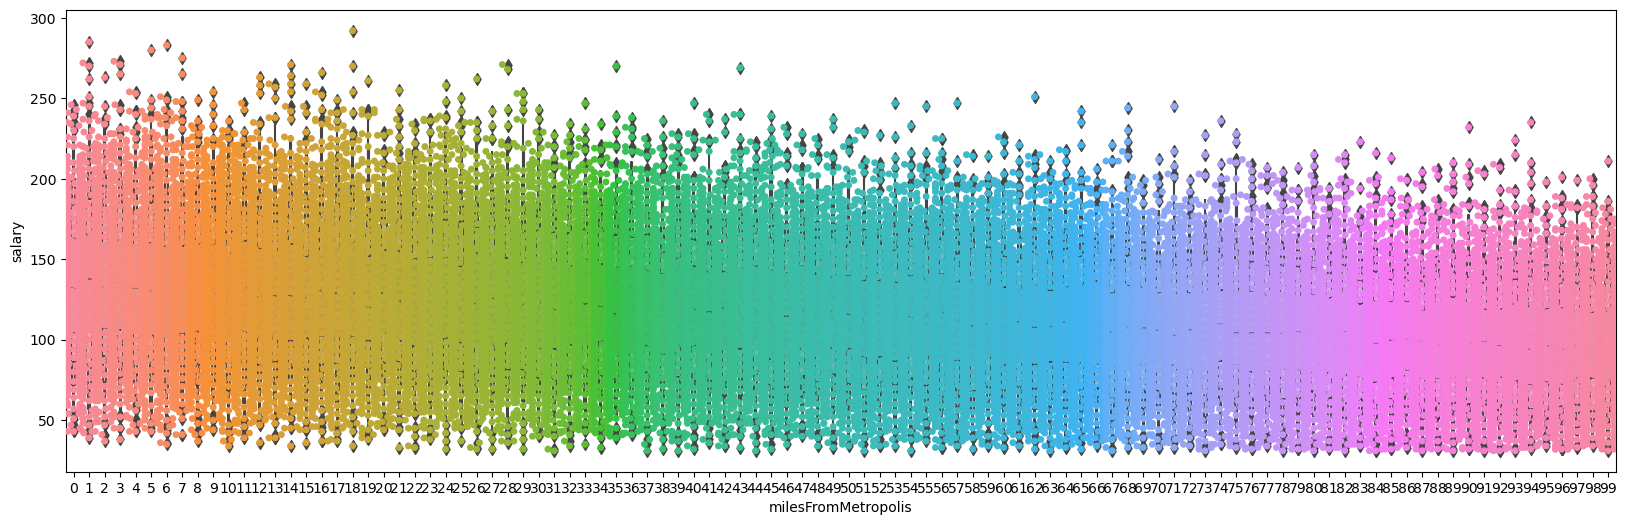

In [38]:
# combine boxen and swarm plot for milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.boxenplot(num['milesFromMetropolis'][:50000],num['salary'][:50000])
sns.swarmplot(num['milesFromMetropolis'][:50000],num['salary'][:50000])
plt.show()

from above combine plot:

1. The distribution between lower adjacent value and upper adjacent value is symmetrical.
2. also there is higher observation probability at the between first quartile and third quartile.

3. The salary range is decreasing as we move right on the axis of milesFromMetropolis

# Strip Plot

A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    1. Horizontal axis = the value of the response variable;
    2. Verticalal axis = all values are set to 1.

That is, a strip plot is simply a plot of the sorted response values along one axis. The strip plot is an alternative to a histogram or a density plot. It is typically used for small data sets (histograms and density plots are typically preferred for larger data sets). 

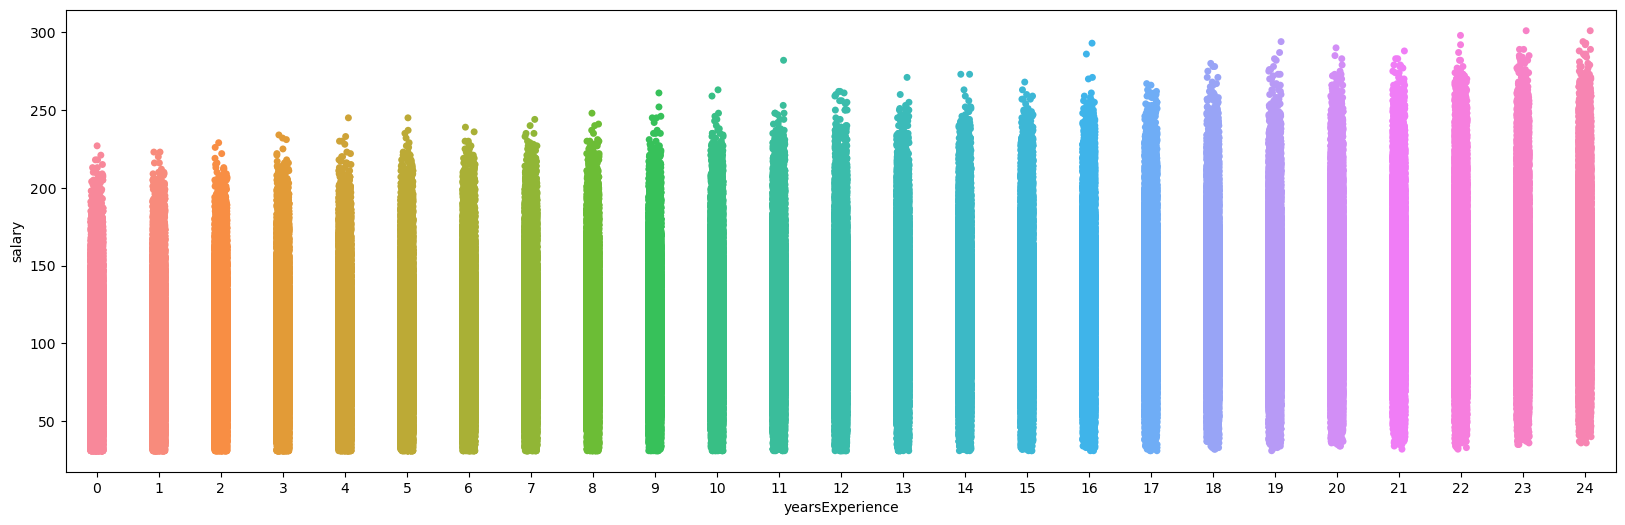

In [39]:
## strip plot between yearsExperience and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(num['yearsExperience'],num['salary'])
plt.show()

from above strip plot:

Distribution of values of Salary increases for increase in values of yearsExperience

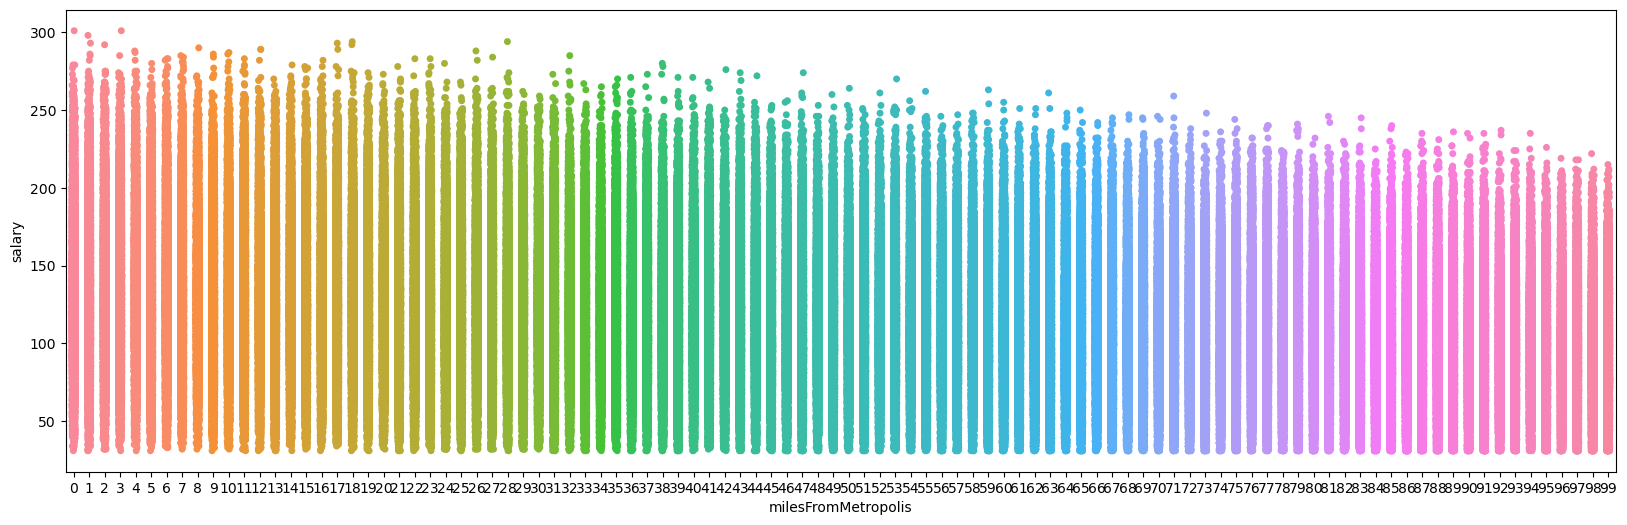

In [40]:
# strip plot between milesFromMetropolis and salary columns
plt.figure(figsize=(20,6))
sns.stripplot(num['milesFromMetropolis'],num['salary'])
plt.show()

from above strip plot:

Distribution of values of Salary decreases for increase in values of milesFromMetropolis

## Variance inflation factor (VIF)

1. The variance inflation factor (VIF) quantifies the extent of correlation between one predictor and the other predictors in a model. 
2. It is used for diagnosing collinearity/multicollinearity. 
3. Higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model.

In [41]:
# import statsmodle library for vif 
import statsmodels.api as sm

In [42]:
# creating a dataframe of just numerical values
train_for_vif = num.drop('salary',axis=1)


# target values
target = num['salary']


# numerical values column names
names = ['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [43]:
# Calculating VIF for each feature.
for i in range(0, len(names)):
  # taking one column as target variable
  y = train_for_vif.loc[:,train_for_vif.columns == names[i]]
  # taking all other remaining columns as fetaure variable
  x = train_for_vif.loc[:,train_for_vif.columns != names[i]]
  # firting the OLS model on y and x
  model = sm.OLS(y,x)
  results = model.fit()
  # geting the r^2 value of results.
  rsq = results.rsquared
  # calculating vif value
  vif = round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq, 2))))
  print("Variance inflation Factor of {} columns is {} \n".format(names[i], vif))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



Observations:

there is colinearity/multicolinearity between 
variables as the VIF value is almost upto 2.5

1. yearsExperience and milesFromMetropolis both have colinearity with all the variables.

## ANOVA Test

### Normality Assumption Check

Before we perform the hypothesis test, we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

### Homogeneity of variance Assumption Check

### Hypothesis Testing

According to five steps process of hypothesis testing:
H₀: μ₁= μ₂ = μ₃ = … = μ₆
H₁: Not all salary means are equal
α = 0.05
According to F test statistics:

In [44]:
# perform anova test between two variables.

def perform_anova_test(x,y):
  # two variables of interest
  train_anova = train[[x,y]]
  groups = train_anova.groupby(x).count().reset_index()
  #groups.plot(kind='bar',x='major',y='salary')
  print(groups)


  # calculate ratio of the largest to the smallest sample standard deviation
  ratio = train_anova.groupby(x).std().max()/train_anova.groupby(x).std().min()
  print(ratio)


  # Create ANOVA backbone table
  data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
  anova_table = pd.DataFrame(data, columns= [ 'Source of Variation', 'SS','df','MS','F','P-value','F crit'])
  anova_table.set_index('Source of Variation', inplace = True)

  # calculate SSTR and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean()-x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

  # calculate SSE and update anova table
  SSE = (train_anova.groupby(x).count()-1) * (train_anova.groupby(x).std())**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

  # calculate SSTR and update anova table
  SSTR = SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

  # update degree of freedom
  anova_table['df']['Between Groups'] = train_anova[x].nunique()-1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0]-1

  # calculate MS
  anova_table['MS'] = anova_table['SS']/anova_table['df']

  # calculate F 
  F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

  # p-value
  anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # F critical 
  alpha = 0.005
  # possible types "right-tailed, left-tailed, two-tailed"
  tail_hypothesis_type = 'two-tailed'
  if tail_hypothesis_type == "two-tailed":
      alpha /= 2
  anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

  # Final ANOVA Table
  print(anova_table)


  # The p-value approach
  print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['P-value']['Between Groups'] <= alpha:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
  print(conclusion)
      
  # The critical value approach
  print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
  conclusion = "Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
      conclusion = "Null Hypothesis is rejected."
  print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
  print(conclusion)

In [45]:
# perform anova test on major and salary
perform_anova_test('major','salary')

         major  salary
0      BIOLOGY   58379
1     BUSINESS   58518
2    CHEMISTRY   58875
3      COMPSCI   58382
4  ENGINEERING   58594
5   LITERATURE   58684
6         MATH   57800
7         NONE  529906
8      PHYSICS   58410
salary    1.137076
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        209547309.494914       8  26193413.686864  20572.997068   
Within Groups        1270060536.615651  997539      1273.193867                 
Total                1479607846.110565  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  2.971836  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 20572.997067846136  and p value is: 1.1102

In [46]:
# perform anova test on jobType and salary
perform_anova_test('jobType','salary')

          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234
salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  3.148654  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 77349.96188255494  and p value is: 1.1

In [47]:
# perform anova test on degree and salary
perform_anova_test('degree','salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612
salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  4.106014  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 47107.26230562572  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.
Approach 2: The critical value approach to hypo

In [48]:
# perform anova test on industry and salary
perform_anova_test('industry','salary')

    industry  salary
0       AUTO  142766
1  EDUCATION  141149
2    FINANCE  142866
3     HEALTH  142736
4        OIL  142770
5    SERVICE  142056
6        WEB  143205
salary    1.119722
dtype: float64
                                    SS      df             MS             F  \
Source of Variation                                                           
Between Groups        126158683.032602       6  21026447.1721  15497.252287   
Within Groups         1353449163.07796  997541    1356.785499                 
Total                1479607846.110562  997547    1483.246249                 

                    P-value    F crit  
Source of Variation                    
Between Groups          0.0  3.374928  
Within Groups                          
Total                                  
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 15497.25228748466  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.
Approach 2: The critical va

In [49]:
# perform anova test on jobType and yearsExperience
perform_anova_test('jobType','yearsExperience')


          jobType  yearsExperience
0             CEO           124778
1             CFO           124369
2             CTO           125045
3         JANITOR           122562
4          JUNIOR           124554
5         MANAGER           125120
6          SENIOR           125886
7  VICE_PRESIDENT           125234
yearsExperience    1.010054
dtype: float64
                                  SS      df          MS         F P-value  \
Source of Variation                                                          
Between Groups           2638.827764       7  376.975395  7.262148     0.0   
Within Groups        51781931.264722  997540   51.909629                     
Total                51784570.092486  997547    51.91191                     

                       F crit  
Source of Variation            
Between Groups       3.148654  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 7.2

In [50]:
# perform anova test on degree and yearsExperience
perform_anova_test('degree','yearsExperience')

        degree  yearsExperience
0    BACHELORS           175495
1     DOCTORAL           175362
2  HIGH_SCHOOL           235769
3      MASTERS           175310
4         NONE           235612
yearsExperience    1.003202
dtype: float64
                                  SS      df          MS         F  P-value  \
Source of Variation                                                           
Between Groups            667.587348       4  166.896837  3.215029  0.01198   
Within Groups        51783902.505138  997543   51.911449                      
Total                51784570.092486  997547    51.91191                      

                       F crit  
Source of Variation            
Between Groups       4.106014  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 3.2150294466062923  and p value is: 0.011980261991255126
Failed to reject the null hypothesis.
Approach 2: The critical v

In [51]:
# perform anova test on major and yearsExperience
perform_anova_test('major','yearsExperience')

         major  yearsExperience
0      BIOLOGY            58379
1     BUSINESS            58518
2    CHEMISTRY            58875
3      COMPSCI            58382
4  ENGINEERING            58594
5   LITERATURE            58684
6         MATH            57800
7         NONE           529906
8      PHYSICS            58410
yearsExperience    1.006637
dtype: float64
                                  SS      df         MS         F  P-value  \
Source of Variation                                                          
Between Groups            565.919745       8  70.739968  1.362696  0.20734   
Within Groups         51784004.17274  997539  51.911759                      
Total                51784570.092485  997547   51.91191                      

                       F crit  
Source of Variation            
Between Groups       2.971836  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is

In [52]:
# perform anova test on industry and yearsExperience
perform_anova_test('industry','yearsExperience')

    industry  yearsExperience
0       AUTO           142766
1  EDUCATION           141149
2    FINANCE           142866
3     HEALTH           142736
4        OIL           142770
5    SERVICE           142056
6        WEB           143205
yearsExperience    1.00656
dtype: float64
                                  SS      df          MS         F   P-value  \
Source of Variation                                                            
Between Groups           1692.550226       6  282.091704  5.434191  0.000012   
Within Groups         51782877.54226  997541   51.910526                       
Total                51784570.092486  997547    51.91191                       

                       F crit  
Source of Variation            
Between Groups       3.374928  
Within Groups                  
Total                          
Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 5.4341908776699475  and p value is: 1.249142777282053e-05
Null Hypoth

## Dendrogram

The dendrogram is a visual representation of the compound correlation data. The individual compounds are arranged along the bottom of the dendrogram and referred to as leaf nodes. Compound clusters are formed by joining individual compounds or existing compound clusters with the join point referred to as a node.

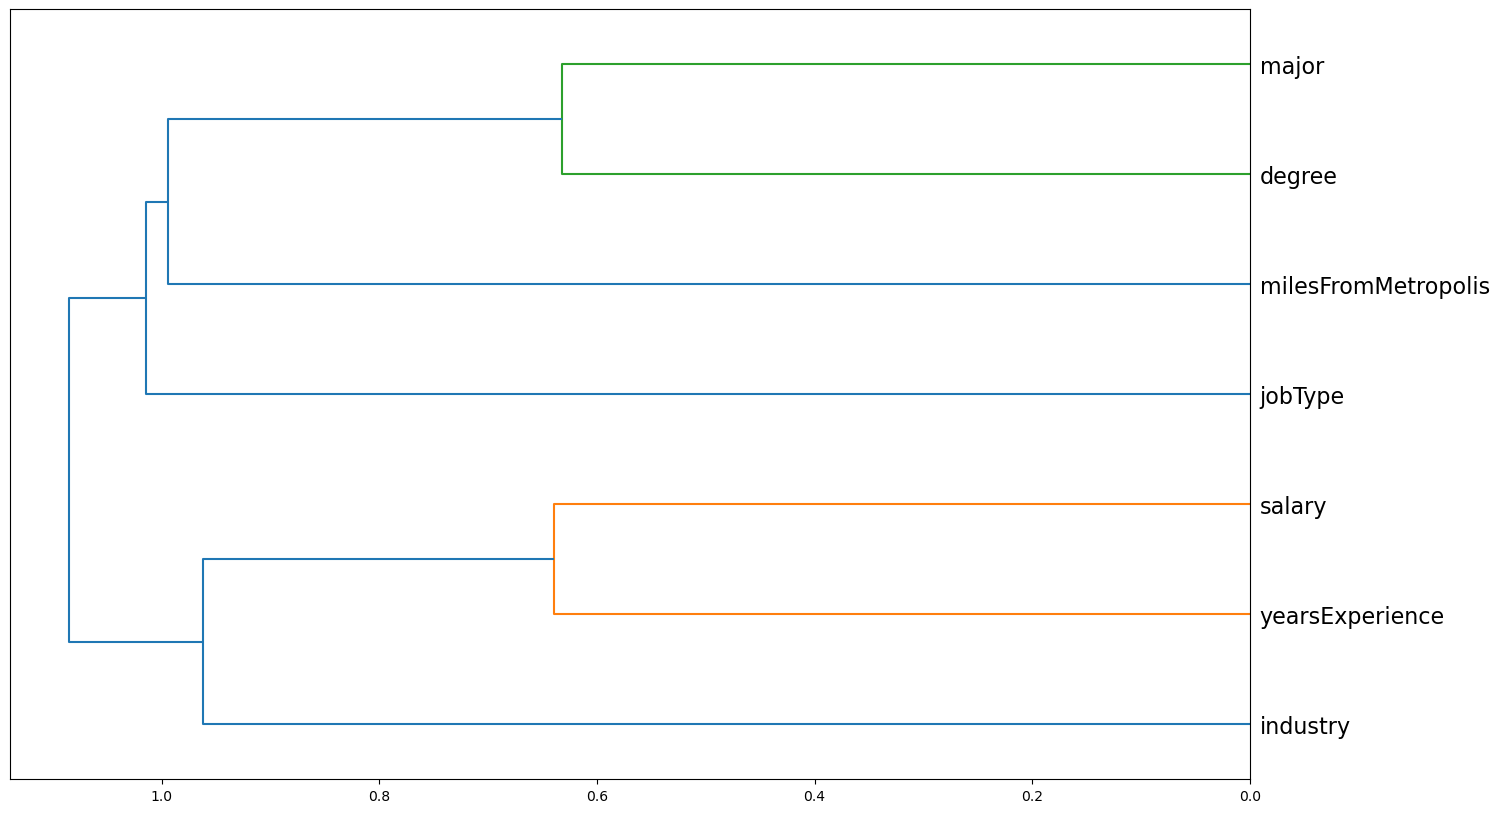

In [53]:
# Plot a Dendrogram on the columns of the dataset (use 50000 sample of 1000000)
X = train.iloc[:50000,:]

import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=train.columns,orientation='left',leaf_font_size=16)
plt.show()

observation from dendrogram

Strongly correlated variables:
1. major and degree
2. salary and yearsExperience

## Since, there are no missing values and all the data are distributed equally. We can start converting the categoricl values to numerical.

## Scaling

### Why scaling is necessary?

* Most of the times, your dataset will contain features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use Euclidean distance between two data points in their computations, this is a problem.
* If left alone, these algorithms only take in the magnitude of features neglecting the units. 
* The results would vary greatly between different units, 5kg and 5000gms. 
* The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes. 
* To suppress this effect, we need to bring all features to the same level of magnitudes. This can be achieved by scaling.

In [54]:
# Helper function for scaling all the numerical data using MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
def scale_data(df,col):
  
  scaler = MinMaxScaler()

  df[col] = scaler.fit_transform(df[col])
  return df

In [55]:
# Making a list of the column names to be scaled 
col_train = ['yearsExperience','milesFromMetropolis']

# passing data and name for scaling
train_data = scale_data(train, col_train)



# Modelling

### One-hot-encoding

A one-hot encoding can be applied to the categorical representation. This is where the categorical variable is removed and a new binary variable is added for each unique categorical value.

In [56]:
from sklearn.preprocessing import OneHotEncoder as one

job = pd.get_dummies(train['jobType'],drop_first=True)
degree = pd.get_dummies(train['degree'],drop_first=True)
major = pd.get_dummies(train['major'],drop_first=True)
industry = pd.get_dummies(train['industry'],drop_first=True)

In [57]:
train = pd.concat([train,job,degree,major,industry],axis=1)

In [58]:
# Split the labels and the target
train_x = train.drop('salary',axis=1)
train_y = train['salary']

In [59]:
train_x.drop(categorical.columns,axis=1,inplace=True)

In [60]:
train_x.head()

yearsExperience  milesFromMetropolis  CFO  CTO  JANITOR  JUNIOR  MANAGER  \
0         0.416667             0.838384    1    0        0       0        0   
1         0.125000             0.737374    0    0        0       0        0   
2         0.416667             0.383838    0    0        0       0        0   
3         0.333333             0.171717    0    0        0       0        1   
4         0.333333             0.161616    0    0        0       0        0   

   SENIOR  VICE_PRESIDENT  DOCTORAL  ...  LITERATURE  MATH  NONE  PHYSICS  \
0       0               0         0  ...           0     1     0        0   
1       0               0         0  ...           0     0     1        0   
2       0               1         1  ...           0     0     0        1   
3       0               0         1  ...           0     0     0        0   
4       0               1         0  ...           0     0     0        1   

   EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
0          0        0       1    0        0    0  
1          0        0       0    0        0    1  
2          0        0       1    0        0    0  
3          0        0       0    0        0    0  
4          0        1       0    0        0    0  

[5 rows x 27 columns]

In [61]:
# for test data
job = pd.get_dummies(test['jobType'],drop_first=True)
degree = pd.get_dummies(test['degree'],drop_first=True)
major = pd.get_dummies(test['major'],drop_first=True)
industry = pd.get_dummies(test['industry'],drop_first=True)

In [62]:
test = pd.concat([test,job,degree,major,industry],axis=1)

In [63]:
test.drop(categorical.columns,axis=1,inplace=True)

In [64]:
test.head()

yearsExperience  milesFromMetropolis  CFO  CTO  JANITOR  JUNIOR  MANAGER  \
0               22                   73    0    0        0       0        1   
1               20                   47    0    0        0       1        0   
2               17                    9    0    1        0       0        0   
3               14                   96    0    0        0       0        1   
4               10                   44    0    0        0       1        0   

   SENIOR  VICE_PRESIDENT  DOCTORAL  ...  LITERATURE  MATH  NONE  PHYSICS  \
0       0               0         0  ...           0     0     1        0   
1       0               0         0  ...           0     0     1        0   
2       0               0         0  ...           0     0     0        0   
3       0               0         0  ...           0     0     1        0   
4       0               0         1  ...           0     0     0        0   

   EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
0          0        0       1    0        0    0  
1          0        0       0    0        0    0  
2          0        0       1    0        0    0  
3          0        0       0    1        0    0  
4          0        0       0    1        0    0  

[5 rows x 27 columns]

In [65]:
test = scale_data(test, col_train)
test.head()

yearsExperience  milesFromMetropolis  CFO  CTO  JANITOR  JUNIOR  MANAGER  \
0         0.916667             0.737374    0    0        0       0        1   
1         0.833333             0.474747    0    0        0       1        0   
2         0.708333             0.090909    0    1        0       0        0   
3         0.583333             0.969697    0    0        0       0        1   
4         0.416667             0.444444    0    0        0       1        0   

   SENIOR  VICE_PRESIDENT  DOCTORAL  ...  LITERATURE  MATH  NONE  PHYSICS  \
0       0               0         0  ...           0     0     1        0   
1       0               0         0  ...           0     0     1        0   
2       0               0         0  ...           0     0     0        0   
3       0               0         0  ...           0     0     1        0   
4       0               0         1  ...           0     0     0        0   

   EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
0          0        0       1    0        0    0  
1          0        0       0    0        0    0  
2          0        0       1    0        0    0  
3          0        0       0    1        0    0  
4          0        0       0    1        0    0  

[5 rows x 27 columns]

In [66]:
#importing Sklearn library for spliting train dataset into train and test dataset(size=0.3)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.3 )

In [67]:
Y_train.head()

283702     46
807855     83
588114    123
589573    127
890482    127
Name: salary, dtype: int64

In [68]:
##1000 rows only to


In [69]:
# importing necessary libraries for geting metrics of models
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

# Function for calculating RMSE 
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

# Function for calculating all the relevant metrics 
def print_score(m):
    res = [rmse(m.predict(X_train), Y_train),rmse(m.predict(X_test), Y_test),
           m.score(X_train, Y_train),m.score(X_test, Y_test),
           median_absolute_error(m.predict(X_train), Y_train),median_absolute_error(m.predict(X_test), Y_test),
           metrics.mean_absolute_error(m.predict(X_train), Y_train),metrics.mean_absolute_error(m.predict(X_test), Y_test),
          
          ]
    

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]))

In [70]:
def visualize_importance(feature_importances, feature_train_df):
    
    feature_importances_df = pd.DataFrame()
    
    _df = pd.DataFrame()
    _df['Feature_importance'] = feature_importances
    _df['columns'] = feature_train_df.columns
    feature_importances_df = pd.concat([feature_importances_df, _df],axis=0, ignore_index=True)
    
    order = feature_importances_df.groupby('columns')\
    .sum()[['Feature_importance']]\
    .sort_values('Feature_importance',ascending=False).index[:50]
    
    fig, ax = plt.subplots(figsize=(8, max(6, len(order)*0.25)))
    sns.boxenplot(data=feature_importances_df,
                 x='Feature_importance',
                 y='columns',
                 order=order,
                 ax=ax,
                 palette='viridis',
                 orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig, ax

### NOTE:
The employee salaries dataset has 1000000 samples.

We have used only 50000 samples for training.

If you want you can use complete dataset.

Using complete dataset will take longer time to train the model.

### Linear Regression

RMSE-Train: 19.633617777012333
RMSE-Test: 19.6114415014038
Score-Train: 0.740210968352689
Score-Test: 0.7404632147036412
MedAE-Train: 13.770919787787932
MedAE-Test: 13.757946523451011
MeanAE-Train: 15.87767047739631
MeanAE-Test: 15.854740748391738
CPU times: total: 3.3 s
Wall time: 2.15 s


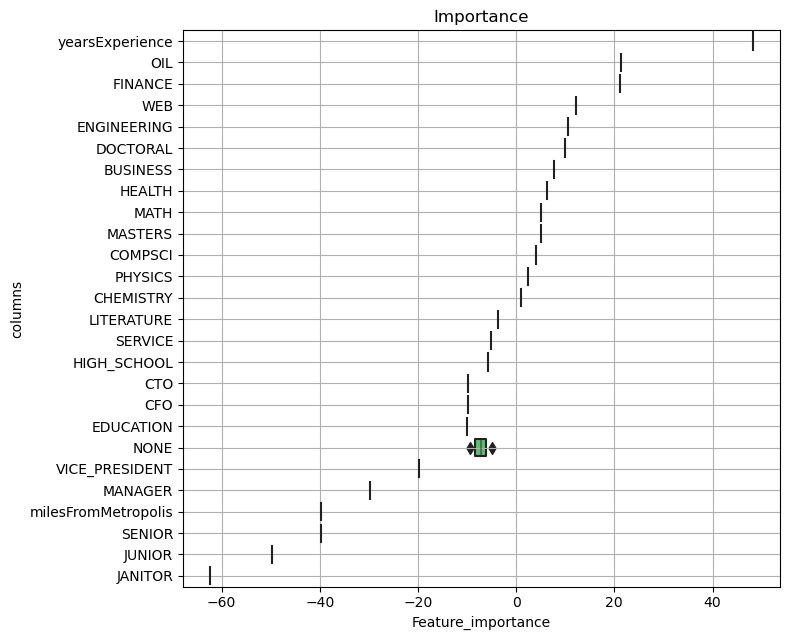

In [71]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr = LinearRegression()


# Fit the model to the data
lr = lr.fit(X_train, Y_train)


# print score of the model
print_score(lr)



# visualizing the inportance of features.
fig, ax = visualize_importance(lr.coef_, X_train)



### Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.

CPU times: total: 7min 6s
Wall time: 7min 29s


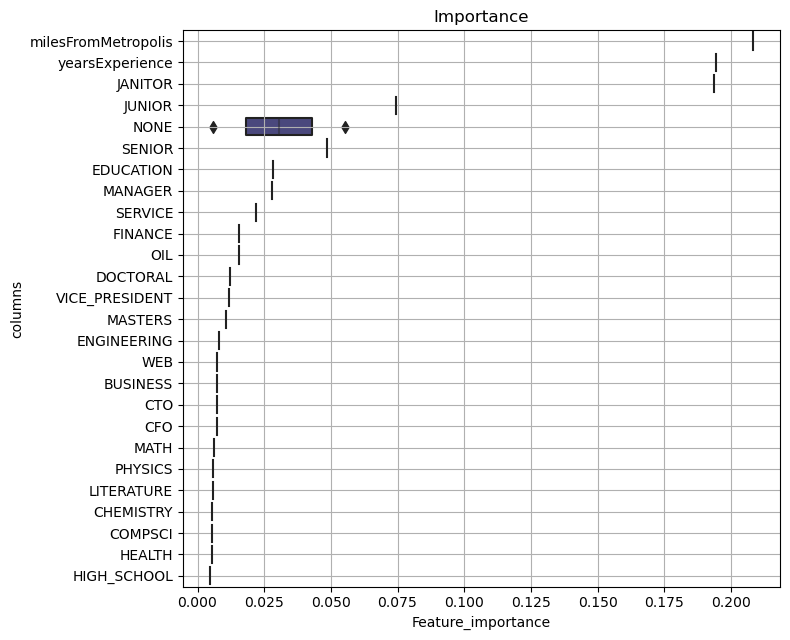

In [72]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf= RandomForestRegressor()


# Fit the model to the data
rf = rf.fit(X_train, Y_train)



# print score of the model
#print_score(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,X_train)




In [73]:
print_score(rf)

RMSE-Train: 10.30536233030023
RMSE-Test: 21.054927294762756
Score-Train: 0.928427418960238
Score-Test: 0.7008511211378323
MedAE-Train: 6.377428571428567
MedAE-Test: 14.07688095238096
MeanAE-Train: 7.926191035426886
MeanAE-Test: 16.74705205868207


### Gradient Boosting Regressor

Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.
it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

RMSE-Train: 19.855525393028234
RMSE-Test: 19.851699001866425
Score-Train: 0.7343052862517216
Score-Test: 0.734065152093889
MedAE-Train: 13.79528881586792
MedAE-Test: 13.768713770880652
MeanAE-Train: 15.953862921267477
MeanAE-Test: 15.948382268208332
CPU times: total: 2min 10s
Wall time: 2min 13s


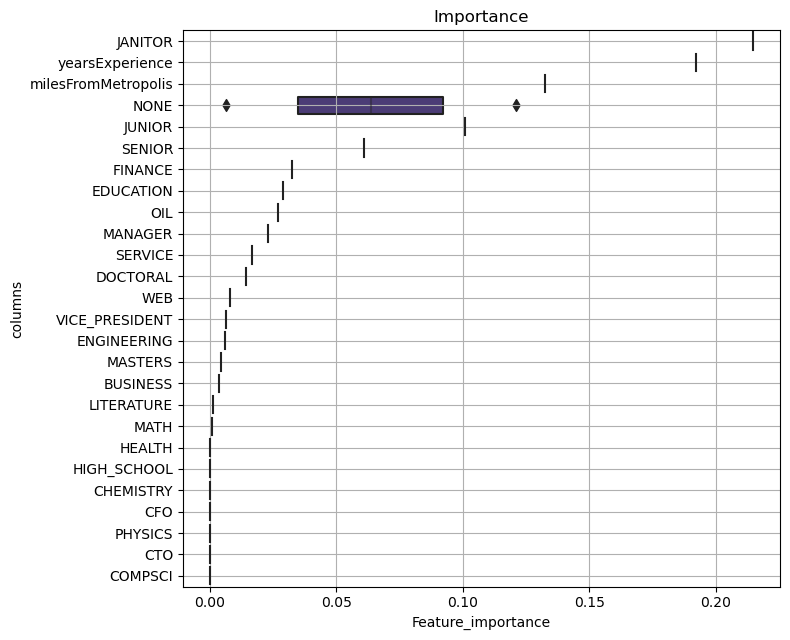

In [74]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()



gbr = GBR.fit(X_train, Y_train)


# print score of the model

print_score(gbr)


# visualizing the inportance of features.
fig, ax = visualize_importance(gbr.feature_importances_, X_train)




### DecisionTree Regressor

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [75]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()



# fit the model
dtr = DTR.fit(X_train, Y_train)


# print score of the model

print_score(dtr)


RMSE-Train: 8.001831808499515
RMSE-Test: 26.388877494171595
Score-Train: 0.9568481932252977
Score-Test: 0.5300823889187785
MedAE-Train: 0.0
MedAE-Test: 16.0
MeanAE-Train: 3.8847334605953936
MeanAE-Test: 20.479659241500503
CPU times: total: 11 s
Wall time: 11.4 s


### AdaBoost Regressor

An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction

RMSE-Train: 27.316743169713707
RMSE-Test: 27.363267045758185
Score-Train: 0.4971042260527604
Score-Test: 0.4947389908913786
MedAE-Train: 21.36347287059003
MedAE-Test: 21.484433679380956
MeanAE-Train: 22.923654605413674
MeanAE-Test: 22.968393527672884
CPU times: total: 3min 36s
Wall time: 3min 39s


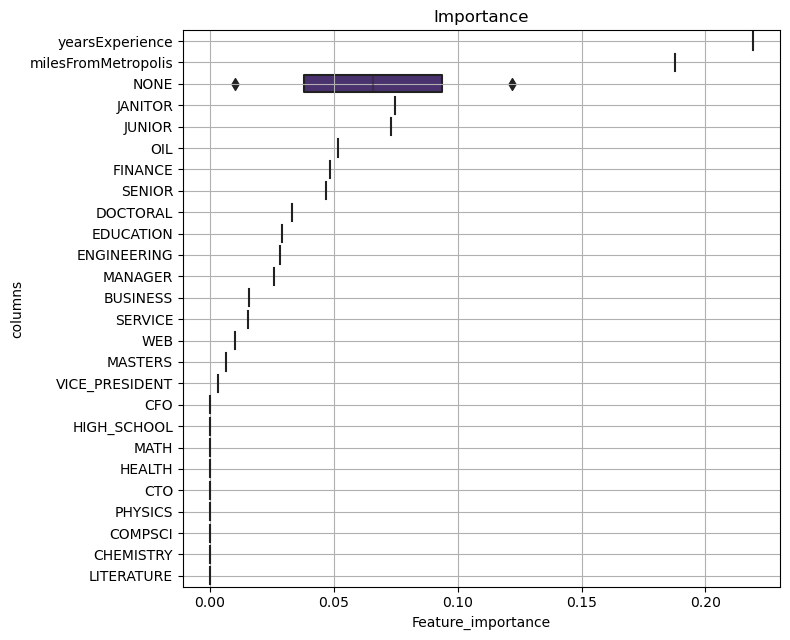

In [76]:
%%time
# Fit a AdaBoost Regressor model to the train dataset

# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the model
AdaBoost = AdaBoostRegressor()


# fit the model

ada  = AdaBoost.fit(X_train, Y_train)


# print score of the model
print_score(ada)



# visualizing the inportance of features.
fig, ax = visualize_importance(ada.feature_importances_, X_train)




## Hyperparameter Tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model. 

Every machine learning models will have different hyperparameters that can be set.

### RamdomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.
 1. The first step is to write the parameters that we want to consider
 2. From these parameters select the best ones.(which are printed in output)

In [77]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator=model,
                              param_distributions=param_grid,
                              n_iter=20,
                              cv=3,
                              verbose=2,
                              n_jobs=-1,
                              return_train_score=True,random_state=42)
  random.fit(X_train, Y_train)
  return random.best_params_
  

In [78]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': range(1,32,1),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestRegressor(),
             X_train, Y_train,rf_para_grid)




Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'n_estimators': 64,
 'min_samples_leaf': 0.1,
 'max_features': 'auto',
 'max_depth': 28,
 'bootstrap': False}

## Using the best parameters and training the models

### Random Forest Regressor

RMSE-Train: 33.49798805891274
RMSE-Test: 33.45571735602941
Score-Train: 0.24376357126410197
Score-Test: 0.24469809466909653
MedAE-Train: 23.4553498068435
MedAE-Test: 23.4553498068435
MeanAE-Train: 27.001194920689894
MeanAE-Test: 26.95038889770224
CPU times: total: 43.1 s
Wall time: 43.6 s


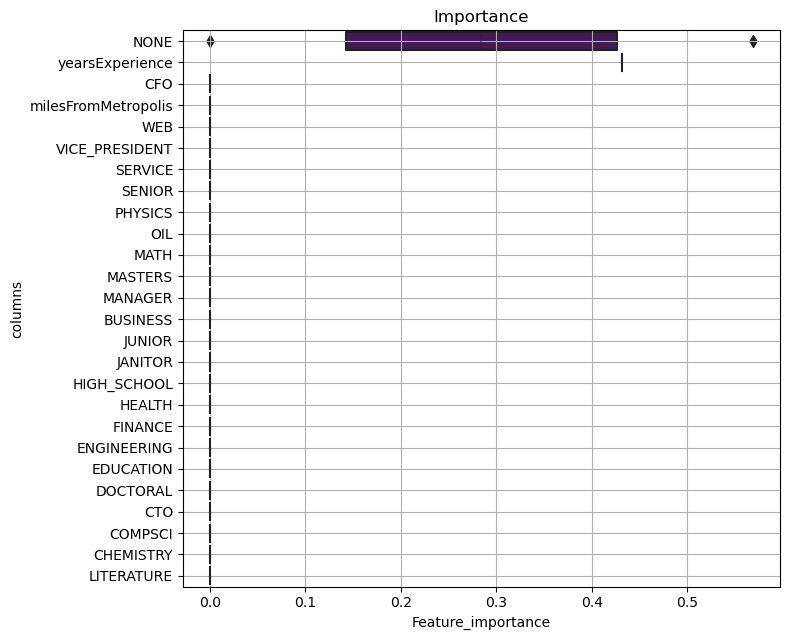

In [79]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(n_estimators=64,
                         min_samples_leaf=0.1,
                         max_features='auto',
                         max_depth=28,
                         bootstrap='False')



# Fit the model to the data
rfmodel = rf.fit(X_train, Y_train)


# print score of the model
print_score(rfmodel)


# visualizing the inportance of features.
fig, ax = visualize_importance(rfmodel.feature_importances_, X_train)




In [80]:
# Perforn the prediction on the test dataset
predictions = rfmodel.predict(test)
predictions[:10]

array([115.12109848, 115.12109848, 143.77342743, 115.12109848,
       118.66686637, 118.66686637, 118.66686637, 118.66686637,
       118.66686637, 115.12109848])

In [82]:
# creating a dataframe of predicted results 
predictions = pd.DataFrame(predictions)

In [83]:
# predicted values in dataframe
predictions

0
0       115.121098
1       115.121098
2       143.773427
3       115.121098
4       118.666866
...            ...
999995  143.773427
999996  115.121098
999997   90.544650
999998  143.773427
999999  115.121098

[1000000 rows x 1 columns]

**Business Problem:**

In [84]:
### we take same samples provided my the manager so that we can explain him the difference between the salary the person should be getting as the salary the person
sample = train[train['salary']<60]
sample = sample.sample(100)
sample.drop(categorical.columns,axis=1,inplace=True)

In [85]:
sample.head()

yearsExperience  milesFromMetropolis  salary  CFO  CTO  JANITOR  \
608716         0.166667             0.636364      40    0    0        1   
678357         0.125000             0.848485      50    0    0        1   
814856         0.041667             0.686869      55    0    0        0   
650336         0.083333             0.979798      37    0    0        1   
120849         0.000000             0.737374      55    0    0        0   

        JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  ...  LITERATURE  MATH  NONE  \
608716       0        0       0               0  ...           0     0     1   
678357       0        0       0               0  ...           0     0     1   
814856       1        0       0               0  ...           0     0     1   
650336       0        0       0               0  ...           0     0     1   
120849       1        0       0               0  ...           0     0     1   

        PHYSICS  EDUCATION  FINANCE  HEALTH  OIL  SERVICE  WEB  
608716        0          0        0       1    0        0    0  
678357        0          0        1       0    0        0    0  
814856        0          0        0       1    0        0    0  
650336        0          0        0       0    0        0    0  
120849        0          0        0       1    0        0    0  

[5 rows x 28 columns]

In [86]:
xsample = sample.drop('salary',axis=1)
ysample = sample['salary']

In [93]:
predicted_out = lr.predict(xsample)
predicted_out[:10]

array([47.18873324, 55.41551026, 55.48015792, 23.35703295, 67.24183291,
       66.04118659, 53.31183603, 40.76325023, 60.86462514, 39.3377283 ])

In [94]:
ysample = ysample.values
ysample = pd.Series(ysample)#Real values

In [95]:
predicted_out = pd.Series(predicted_out)

In [96]:
compare = pd.DataFrame()

In [97]:
compare['Actual'] = ysample
compare['Predicted'] = predicted_out
compare

Actual  Predicted
0       40  47.188733
1       50  55.415510
2       55  55.480158
3       37  23.357033
4       55  67.241833
..     ...        ...
95      51  46.381788
96      56  69.576037
97      44  48.952463
98      56  84.600932
99      47  56.425725

[100 rows x 2 columns]

### As we can see the difference in values.

**Example**: As you can see there is a huge difference between actual values and predicted values...This may be because the other competitors are offering him more as compared to the current salary..so he is leaving the company.

**Here, we can clearly see a difference between the real salary given to the employee and the predicted salary which may be the probable reason for the employee to leave the company**

## **`solution`**:

1. Either increase the salary of these employee's(if they have the required degree and major)

2. Provide accomodation to people living in places far from city so that they are satisfied.

3. provide appraisal or some token of appreciation to such employee's